In [1]:
#pip install pyspark
#pip install setuptools
# pip install seaborn

In [2]:
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import random

In [3]:
df_logs_5 = pd.read_parquet('data/logs_df_2024-08-05.parquet', engine='pyarrow')
df_logs_5.head(3)

,event_timestamp,user_id,region,city,video_id,watchtime
0,2024-08-05 12:12:32+03:00,bd1b6b07-e6a2-46ad-aa58-990bb7e89252,288eb079-1c29-4749-ab7e-550451a4d765,da903ff0-9eb8-4e91-b25d-22c70f962ca2,0af133e1-4fbf-4e10-b9e8-19fbe1a011c3,32
1,2024-08-05 18:30:15+03:00,7db026fc-b55c-4580-bc26-e3df59ba6c7c,f58ab76f-2581-447a-b95b-5832e8757054,8449a572-fd10-44ae-a899-af656e350ad9,4f42aab2-6238-4381-bb53-36213916e912,340
2,2024-08-05 12:35:16+03:00,5c94a654-f376-4529-b463-b62b6b50e8ca,2c1f4ce4-66e0-4481-a0ed-244bf76fa83a,93a12888-fdf4-4889-a1ef-3ef0537d674d,8b106b84-f3f5-4c27-820c-7e1546b43614,12


In [4]:
df_video = pd.read_parquet('data/video_stat.parquet', engine= 'pyarrow')
df_video

,video_id,v_pub_datetime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,...,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number,title,description,category_id,author_id
0,973f24c0-15b2-434f-8740-4e2726f79c30,2024-06-15 22:58:03+03:00,0,556,2,0,0,0,0,7.733,...,1.656386,1.616750,0,0,0,1,пережила свой яд,,Мультфильмы,79276150-fdaf-4626-9452-6f1ad975741d
1,1a3f527c-44b2-4f7e-9641-26f078edbf2e,2021-04-18 17:27:42+03:00,0,109,2,1,0,0,0,379.000,...,5.570802,5.649635,0,0,0,1,"🎓Знаете ли Вы, что ؟ Интересные факты ! # ...","🎓Знаете ли Вы, что ? Интересные факты ! # 2🎓...",Развлечения,16278647-5912-48af-a071-582dcfd0e354
2,2f563d09-45ef-4e27-8da0-daa74235a2e7,2022-11-17 16:36:43+03:00,0,163,2,2,0,0,0,1020.767,...,0.342614,0.285310,0,0,0,1,"ЗИМНЯЯ, ТЕПЛАЯ ШЛЯПА крючком. Как связать поля...",Шляпа связана из пряжи NAKO Sport Wool в 100гр...,Хобби,9afa94aa-c2a6-43fc-a0d1-175eaf7fa194


In [4]:
df_video = pd.read_parquet('data/video_stat.parquet', engine= 'pyarrow')
columns = [
    "video_id",
    "title",
    "v_pub_datetime",
    "category_id",
    "v_total_comments",
    "v_year_views",
    "v_duration",
    "v_likes",
    "v_dislikes",
    "cmments_per_day", "v_long_views_7_days"
]
df_video1 = df_video[columns]
df_video1.to_parquet('data/video_stat1.parquet')

In [5]:
df_video1

,video_id,title,v_pub_datetime,category_id,v_total_comments,v_year_views,v_duration,v_likes,v_dislikes,cmments_per_day,v_long_views_7_days
0,973f24c0-15b2-434f-8740-4e2726f79c30,пережила свой яд,2024-06-15 22:58:03+03:00,Мультфильмы,0,556,7.733,0,0,0.0,0
1,1a3f527c-44b2-4f7e-9641-26f078edbf2e,"🎓Знаете ли Вы, что ؟ Интересные факты ! # ...",2021-04-18 17:27:42+03:00,Развлечения,0,109,379.000,0,0,0.0,0
2,2f563d09-45ef-4e27-8da0-daa74235a2e7,"ЗИМНЯЯ, ТЕПЛАЯ ШЛЯПА крючком. Как связать поля...",2022-11-17 16:36:43+03:00,Хобби,0,163,1020.767,0,0,0.0,0
3,154fac0e-1794-4406-afa0-61f688e3a764,найк,2010-01-01 00:00:01+03:00,Животные,0,10657,42.025,24,0,0.0,1162
4,470b4e3e-e06d-4370-80dc-34d6a78b22db,SHACMAN. Шакман замена двухрядного подшипника ...,2023-11-29 16:49:46+03:00,Разное,0,154,695.647,0,0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...
1936081,6e3067be-8602-4889-b296-3dbba9e29a14,Сергий против нечисти сериал / сергий против н...,2023-07-22 17:48:30+03:00,Сериалы,0,705,92.996,0,0,0.0,5
1936082,542bb668-c8ec-4047-80c6-d98b39d3b7ce,Greece 2-1 Nigeria,2010-06-17 18:38:04+03:00,Спорт,0,109,65.280,0,0,0.0,0
1936083,eeeb7b1e-6e46-4633-a9fb-3782256857f5,Сказочный патруль когда выйдут 76-77 серии тео...,2022-11-06 09:24:55+03:00,Лайфстайл,0,162,94.134,0,0,0.0,0
1936084,7ef043b7-a34c-40c7-865e-1b251b00df72,Гайд на 120 фпс // Разблокировка Фпс после 9.2...,2023-11-17 01:35:34+03:00,Разное,0,144,321.829,0,0,0.0,2


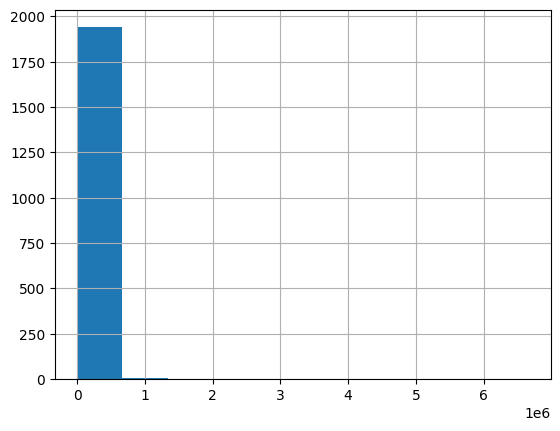

region
00158539-b113-474b-8635-ad8900982ef6         4
0021e884-62ab-44c6-b8f5-e5814ef9199b         1
004bad7f-04d4-42f0-a128-49cd8ac88f60    158983
004eebc3-0c33-4d42-9e1f-91d9fb3f70e6        15
0072ad84-e480-4958-b7f2-9bc26c76e67f         1
                                         ...  
ff317014-3244-4d15-9280-3238fa00367e        35
ff52fd61-a3cf-4105-a2fd-dcb505b2d04a        16
ffaa4cfa-7f80-41f5-a4bc-bf61aa38083d         1
ffb64ad3-caa7-452c-809d-e812983187bd         1
ffeaff41-f62a-4ba1-8d3c-37b558e22bf5        30
Name: view_count, Length: 1949, dtype: int64
-332825.79442713177
24276
24276


,region,rounded_hour,view_count
0,00158539-b113-474b-8635-ad8900982ef6,2024-08-05 01:00:00+03:00,1
1,00158539-b113-474b-8635-ad8900982ef6,2024-08-05 07:00:00+03:00,1
2,00158539-b113-474b-8635-ad8900982ef6,2024-08-05 19:00:00+03:00,1
3,00158539-b113-474b-8635-ad8900982ef6,2024-08-05 23:00:00+03:00,1
4,0021e884-62ab-44c6-b8f5-e5814ef9199b,2024-08-05 23:00:00+03:00,1
...,...,...,...
24271,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,2024-08-05 19:00:00+03:00,2
24272,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,2024-08-05 20:00:00+03:00,2
24273,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,2024-08-05 21:00:00+03:00,3
24274,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,2024-08-05 22:00:00+03:00,1


In [74]:

# Преобразуем event_timestamp в datetime
df_logs_5['event_timestamp'] = pd.to_datetime(df_logs_5['event_timestamp'])

# Округляем время до ближайшего часа
df_logs_5['rounded_hour'] = df_logs_5['event_timestamp'].dt.floor('H') + pd.to_timedelta((df_logs_5['event_timestamp'].dt.minute >= 30).astype(int), unit='H')

# Группируем данные по региону и округленному часу, считая количество просмотров
hourly_region_views = df_logs_5.groupby(['region', 'rounded_hour']).size().reset_index(name='view_count')

# Находим регион с наибольшим количеством просмотров и его пик
region_max_views = df_logs_5['region'].value_counts().idxmax()
peak_max_region = hourly_region_views[hourly_region_views['region'] == region_max_views]

# Находим время пика для региона с наибольшим количеством просмотров
peak_max_time = peak_max_region.loc[peak_max_region['view_count'].idxmax(), 'rounded_hour']

# Функция для сдвига времени в регионе на пиковое время региона с максимальными просмотрами
def shift_to_peak(df, region_peak_time, global_peak_time):
    df['time_shift'] = (global_peak_time - region_peak_time).total_seconds() / 3600
    df['adjusted_hour'] = df['rounded_hour'] + pd.to_timedelta(df['time_shift'], unit='h')
    df['adjusted_hour_str'] = df['adjusted_hour'].dt.strftime('%Y-%m-%d %H:00')  # Форматируем время
    return df

# Новый датафрейм для хранения всех сдвинутых значений
shifted_views = pd.DataFrame()

# Обрабатываем каждый регион отдельно
for region in df_logs_5['region'].unique():
    region_data = hourly_region_views[hourly_region_views['region'] == region]
    
    # Находим пиковое время для текущего региона
    peak_region_time = region_data.loc[region_data['view_count'].idxmax(), 'rounded_hour']
    
    # Сдвигаем время региона на основе пикового времени
    region_data = shift_to_peak(region_data, peak_region_time, peak_max_time)
    
    # Добавляем данные региона в итоговый датафрейм
    shifted_views = pd.concat([shifted_views, region_data])


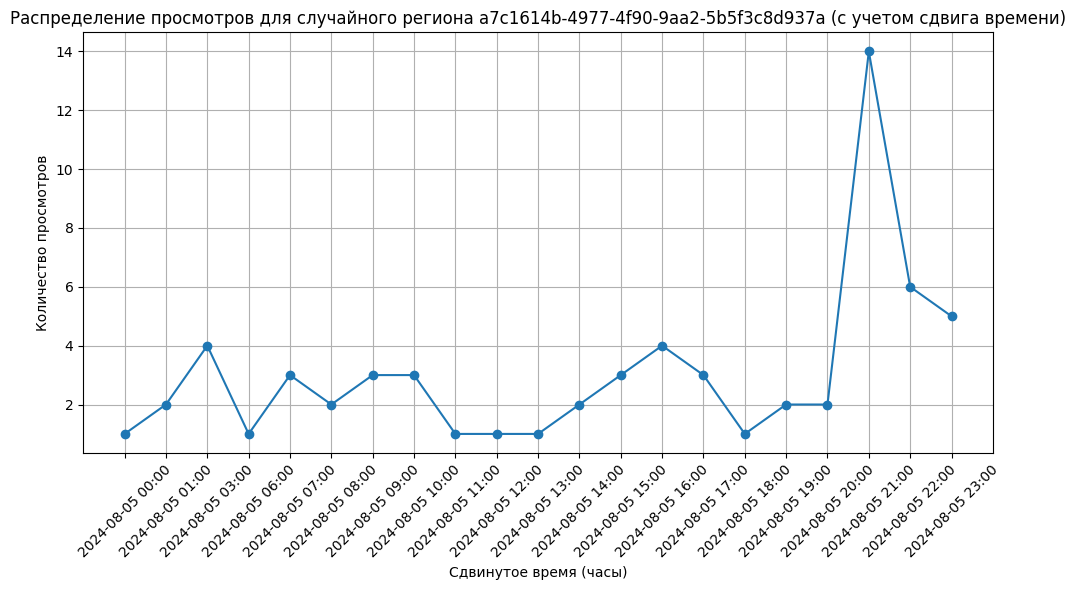

In [59]:

# Выбираем случайный регион для построения графика
random_region = random.choice(shifted_views['region'].unique())

# Группируем данные для случайного региона
random_region_data = shifted_views[shifted_views['region'] == random_region]

# Строим график для случайного региона с учетом сдвига времени
plt.figure(figsize=(10, 6))
plt.plot(random_region_data['adjusted_hour_str'], random_region_data['view_count'], marker='o', label=f'Region {random_region}')

# Настройки графика
plt.xlabel('Сдвинутое время (часы)')
plt.ylabel('Количество просмотров')
plt.title(f'Распределение просмотров для случайного региона {random_region} (с учетом сдвига времени)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Шаг 2. Объединение данных по video_id
df_merged = pd.merge(df_logs_5[['video_id', 'region', 'watchtime']], 
                     df_video[['video_id', 'category_id']], 
                     on='video_id', 
                     how='inner')

# Шаг 3. Вычисление среднего watchtime для каждой категории по каждому региону
df_avg_watchtime = (df_merged.groupby(['region', 'category_id'], as_index=False)
                             .agg(avg_watchtime=('watchtime', 'mean')))

# Шаг 4. Определение топ-10 категорий по каждому региону
df_avg_watchtime['rank'] = df_avg_watchtime.groupby('region')['avg_watchtime'].rank(method='first', ascending=False)

# Фильтруем только топ-10 по каждому региону
df_top10 = df_avg_watchtime[df_avg_watchtime['rank'] <= 10]

# Вывод результатов
df_top10.sort_values(by=['region', 'rank'])

,region,category_id,avg_watchtime,rank
1,00158539-b113-474b-8635-ad8900982ef6,Разное,193.000000,1.0
0,00158539-b113-474b-8635-ad8900982ef6,Лайфстайл,32.000000,2.0
2,0021e884-62ab-44c6-b8f5-e5814ef9199b,Телепередачи,2082.000000,1.0
36,004bad7f-04d4-42f0-a128-49cd8ac88f60,Телепередачи,1745.973660,1.0
39,004bad7f-04d4-42f0-a128-49cd8ac88f60,Фильмы,1688.694701,2.0
...,...,...,...,...
24179,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,Интервью,15.000000,4.0
24181,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,Обучение,10.000000,5.0
24182,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,Развлечения,2.000000,6.0
24180,ffeaff41-f62a-4ba1-8d3c-37b558e22bf5,Лайфстайл,0.000000,7.0


In [76]:
# Шаг 3. Определяем регион с наибольшим количеством просмотров
region_max_views = filtered_hourly_region_views['region'].value_counts().idxmax()

# Шаг 4. Фильтруем данные только для этого региона
df_region = df_logs_5[df_logs_5['region'] == region_max_views]

# Шаг 5. Объединение данных по video_id (из df_video добавляем информацию о категориях)
df_merged = pd.merge(df_region[['video_id', 'region', 'rounded_hour', 'watchtime']], 
                     df_video[['video_id', 'category_id']], 
                     on='video_id', 
                     how='inner')

# Шаг 6. Вычисление среднего watchtime для каждой категории по каждому часу
df_avg_watchtime = (df_merged.groupby(['rounded_hour', 'category_id'], as_index=False)
                             .agg(avg_watchtime=('watchtime', 'mean')))

# Шаг 7. Определение топ-10 категорий по каждому часу
df_avg_watchtime['rank'] = df_avg_watchtime.groupby('rounded_hour')['avg_watchtime'].rank(method='first', ascending=False)

# Фильтруем только топ-10 по каждому часу
df_top10 = df_avg_watchtime[df_avg_watchtime['rank'] <= 10]

# Шаг 8. Построение сводной таблицы, где строки — это ранги, а колонки — это время (час)
pivot_table = df_top10.pivot_table(index='rank', 
                                   columns='rounded_hour', 
                                   values='category_id', 
                                   aggfunc='first')

# Вывод результатов
pivot_table.sort_index()

rounded_hour,2024-08-05 00:00:00+03:00,2024-08-05 01:00:00+03:00,2024-08-05 02:00:00+03:00,2024-08-05 03:00:00+03:00,2024-08-05 04:00:00+03:00,2024-08-05 05:00:00+03:00,2024-08-05 06:00:00+03:00,2024-08-05 07:00:00+03:00,2024-08-05 08:00:00+03:00,2024-08-05 09:00:00+03:00,...,2024-08-05 15:00:00+03:00,2024-08-05 16:00:00+03:00,2024-08-05 17:00:00+03:00,2024-08-05 18:00:00+03:00,2024-08-05 19:00:00+03:00,2024-08-05 20:00:00+03:00,2024-08-05 21:00:00+03:00,2024-08-05 22:00:00+03:00,2024-08-05 23:00:00+03:00,2024-08-06 00:00:00+03:00
rank,,,,,,,,,,,,,,,,,,,,,
1.0,Мультфильмы,Авто-мото,Фильмы,Фильмы,Развлечения,Телепередачи,Авто-мото,Сериалы,Мультфильмы,Телепередачи,...,Фильмы,Телепередачи,Фильмы,Фильмы,Авто-мото,Фильмы,Фильмы,Авто-мото,Музыка,Мультфильмы
2.0,Телепередачи,Сериалы,Сериалы,Развлечения,Сериалы,Сериалы,Наука,Телепередачи,Охота и рыбалка,Фильмы,...,Телепередачи,Сериалы,Авто-мото,Телепередачи,Телепередачи,Авто-мото,Сериалы,Фильмы,Телепередачи,Фильмы
3.0,Аудио,Телепередачи,Разное,Авто-мото,Телепередачи,Мультфильмы,Телепередачи,Культура,Развлечения,Мультфильмы,...,Сериалы,Охота и рыбалка,Аниме,Технологии и интернет,Лайфстайл,Телепередачи,Телепередачи,Музыка,Сериалы,Сериалы
4.0,Красота,Мультфильмы,Развлечения,Сериалы,Детям,Музыка,Развлечения,Разное,Телепередачи,Сериалы,...,Охота и рыбалка,Фильмы,Путешествия,Сериалы,Сериалы,Сериалы,Мультфильмы,Телепередачи,Фильмы,Телепередачи
5.0,Сериалы,Фильмы,Видеоигры,Разное,Видеоигры,Детям,Сериалы,Музыка,Сериалы,Аудиокниги,...,Детям,Техника и оборудование,Сериалы,Аниме,Фильмы,Разное,Детям,Разное,Детям,Разное
6.0,Детям,Развлечения,Детям,Аудио,Разное,Видеоигры,Разное,Развлечения,Видеоигры,Видеоигры,...,Мультфильмы,Мультфильмы,Телепередачи,Детям,Путешествия,Еда,Разное,Сериалы,Мультфильмы,Детям
7.0,Разное,Спорт,Мультфильмы,Телепередачи,Мультфильмы,Фильмы,Видеоигры,Обучение,Разное,Разное,...,Интервью,Детям,Мультфильмы,Охота и рыбалка,Юмор,Детям,Развлечения,Мультфильмы,Видеоигры,Видеоигры
8.0,Музыка,Лайфстайл,Лайфстайл,Детям,Музыка,Развлечения,Еда,Детям,Музыка,Детям,...,Разное,Авто-мото,Разное,Спорт,Разное,Охота и рыбалка,Юмор,Путешествия,Разное,Развлечения
9.0,Видеоигры,Красота,Охота и рыбалка,Мультфильмы,Еда,Разное,Интервью,Мультфильмы,Аудио,Лайфстайл,...,Развлечения,Спорт,Развлечения,Лайфстайл,Животные,Мультфильмы,Еда,Детям,Авто-мото,Авто-мото


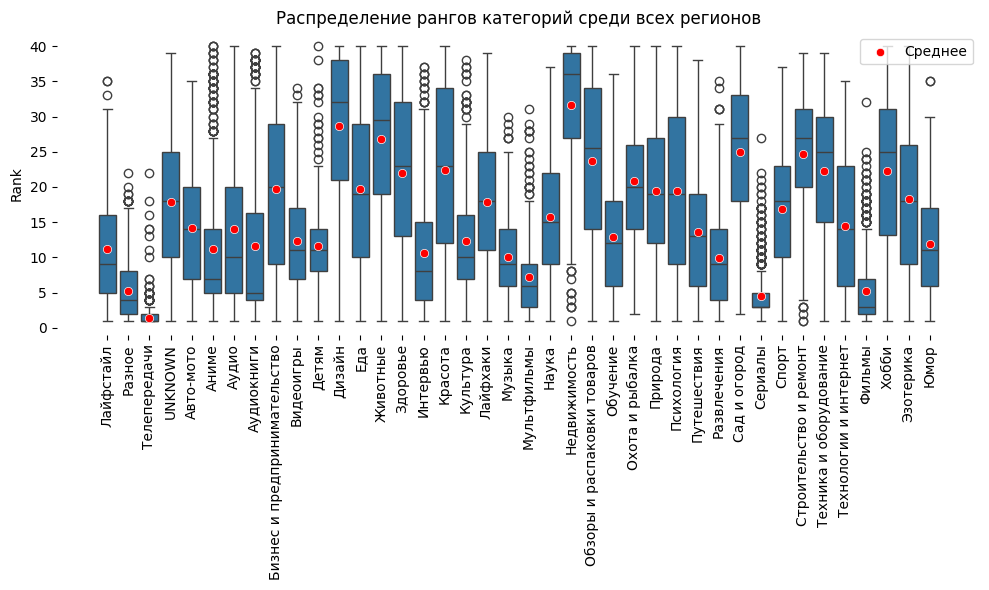

In [22]:

# Шаг 1: Найдём средний ранг для каждой категории
df_avg_rank = df_avg_watchtime.groupby('category_id').agg(avg_rank=('rank', 'mean')).reset_index()

# Шаг 2: Создание боксплота для рангов категорий по регионам
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_avg_watchtime, x='category_id', y='rank')

# Отметим средний ранг каждой категории на боксплоте
sns.scatterplot(data=df_avg_rank, x='category_id', y='avg_rank', color='red', label='Среднее', zorder=5)

plt.title('Распределение рангов категорий среди всех регионов')
plt.xlabel('')
plt.ylabel('Rank')
plt.xticks(rotation=90)
sns.despine(top=True, right=True, bottom = True, left= True)

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
